# **Notes Classifier**
Model for classifying notes into 7 classes: 10, 20, 50, 100, 200, 500, 2000

### **Importing necessary libraries**

In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint

2023-12-01 09:44:02.926531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 09:44:02.926574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 09:44:02.926607: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 09:44:02.933557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
IMAGE_SIZE = (170, 320)
BATCH_SIZE = 10
EPOCHS = 20

### **Splitting dataset for training and validation**

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'data/multiclass/notes',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'data/multiclass/notes',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 840 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


### **Checkpoints**

In [4]:
checkpoint_path = "checkpoints/notes-classifier.h5"

In [5]:
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

### **CNN**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(170, 320, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

2023-12-01 09:44:09.951888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 09:44:09.958361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 09:44:09.958583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 168, 318, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 159, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 157, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 78, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 76, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 38, 64)        0

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Training model**

In [8]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/20


2023-11-29 18:27:13.482537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-29 18:27:15.658047: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efa740397a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 18:27:15.658120: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-11-29 18:27:15.668662: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-29 18:27:15.770118: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 [==============================] - ETA: 0s - loss: 1.3929 - accuracy: 0.4238
Epoch 1: val_accuracy improved from -inf to 0.76190, saving model to checkpoints/notes-classifier.h5
84/84 [==============================] - 15s 114ms/step - loss: 1.3929 - accuracy: 0.4238 - val_loss: 0.6471 - val_accuracy: 0.7619
Epoch 2/20


/home/hrishi/Miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - ETA: 0s - loss: 0.7770 - accuracy: 0.6762
Epoch 2: val_accuracy improved from 0.76190 to 0.84286, saving model to checkpoints/notes-classifier.h5
84/84 [==============================] - 10s 115ms/step - loss: 0.7770 - accuracy: 0.6762 - val_loss: 0.4160 - val_accuracy: 0.8429
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.8155
Epoch 3: val_accuracy did not improve from 0.84286
84/84 [==============================] - 9s 109ms/step - loss: 0.5155 - accuracy: 0.8155 - val_loss: 0.8472 - val_accuracy: 0.7857
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.8119
Epoch 4: val_accuracy improved from 0.84286 to 0.91429, saving model to checkpoints/notes-classifier.h5
84/84 [==============================] - 10s 115ms/step - loss: 0.5363 - accuracy: 0.8119 - val_loss: 0.2570 - val_accuracy: 0.9143
Epoch 5/20
84/84 [==============================] - ETA: 0s - loss: 0.4125 

### **Saving trained model**

In [9]:
model.save('saved-models/notes-classifier.h5')

### **Model metrics and visualization**

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#### **Accuracy**

In [11]:
avg_train_acc = np.mean(history.history['accuracy'])
avg_val_acc = np.mean(history.history['val_accuracy'])

print(f'Average Training Accuracy: {avg_train_acc*100}%')
print(f'Average Validation Accuracy: {avg_val_acc*100}%')

Average Training Accuracy: 87.97619074583054%
Average Validation Accuracy: 93.8095223903656%


#### **Confusion Matrix**

21/21 [==============================] - 2s 90ms/step


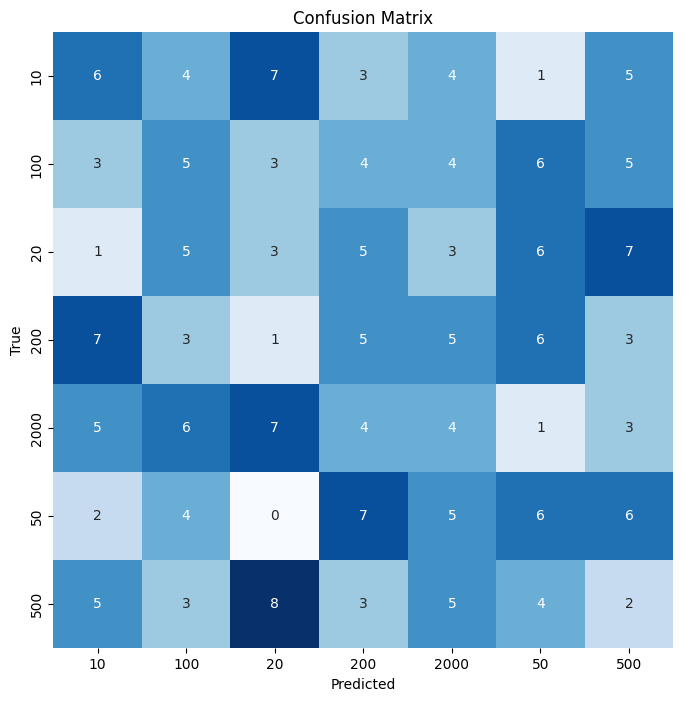

In [12]:
# Generate predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=train_generator.class_indices,
            yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### **Classification Report**

In [14]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          10       0.21      0.20      0.20        30
         100       0.17      0.17      0.17        30
          20       0.10      0.10      0.10        30
         200       0.16      0.17      0.16        30
        2000       0.13      0.13      0.13        30
          50       0.20      0.20      0.20        30
         500       0.06      0.07      0.07        30

    accuracy                           0.15       210
   macro avg       0.15      0.15      0.15       210
weighted avg       0.15      0.15      0.15       210



#### **Loss and Accuracy graphs**

In [15]:
epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

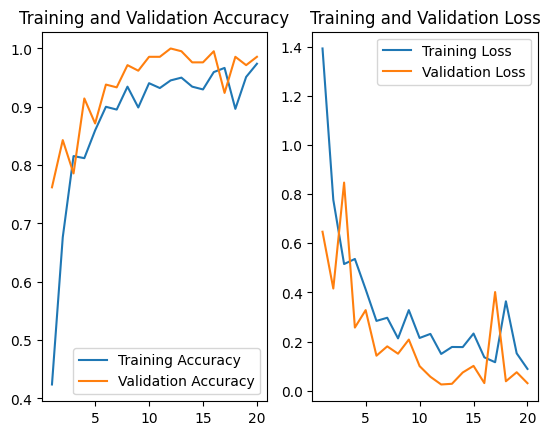

In [16]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()